<a href="https://colab.research.google.com/github/HarryWang0619/ECE-317-Quantum-Computing/blob/main/Haochen_Wang_Lab_6_Quantum_circuits_adder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 397 QC

## Introduction to Quantum Computing – Spring 2022

Instructor – Professor Robert Niffenegger (rniffenegger@umass.edu ) Marcus 215B

Labs -  Engineering Lab 307

Time – MWF 12:20-1:10

Teaching Assistant – Ivan Williams ( inwilliams@umass.edu ) 

---

### Textbook
>Quantum Computation and Quantum Information , Authors:	Michael A. Nielsen, Isaac L. Chuang



##Supporting Materials: 

### Quantum Optics:

•	Ivan H. Deutsch’s Notes
http://info.phys.unm.edu/~ideutsch/Classes/Phys566F21/ 

•	Daniel Steck’s Notes
https://atomoptics.uoregon.edu/~dsteck/teaching/quantum-optics/

###Quantum Computation:

•	Thomas Wong’s Textbook:
https://www.amazon.com/Introduction-Classical-Quantum-Computing-Thomas-dp-B09QP2MYYM/dp/B09QP2MYYM/

http://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e.pdf

•	IBM’s Qiskit Textbook - https://qiskit.org/textbook-beta 


#How to use this Notebook

1. Create a copy for you to edit and update the filename with your UMass username. 

2. Experiment! This notebook is just a starting point for you to explore. If you have ideas for things to try start by typing out the pseduo code first then see if you can find help to get the syntax and libraries to make it work. 

3. Teamwork. Working in teams will help everyone check their code and debug errors. Please work in groups of up to three people. You may all share code but please maintain your own copy of the notebook to turn in for credit.

4. Hand written paper notebook still required. This colab notebook is a supplement to a paper notebook and the textbooks listed above. To test out ideas, check mathematical relations and linear algebra proofs and to complete exercises you will need a real physical paper notebook to do your work. Please have one and a pen/pencil handy. 
Related: Be careful not to get bogged down in the code if it is not working. Reach out to your team, the TA or me to get assistance. 

5. Programming Resources: 
  *   https://colab.research.google.com/notebooks/basic_features_overview.ipynb
  *   https://www.dataquest.io/blog/jupyter-notebook-tutorial/
  *   https://www.youtube.com/watch?v=inN8seMm7UI 
  *   https://nbviewer.ipython.org/github/qutip/qutip-notebooks/blob/master/examples/qubit-dynamics.ipynb
  * FYI: Colab provides hardware acceleration with GPUs and TPUs if you go to 'Runtime>Change Runtime type'


#QuTiP

All labs will be run in the colaboratory Jupyter notebook like this one. 

To get started we first need to install QuTiP using 'pip' within Colab. 

(Any library not native to Colab can be installed this way.)

In [ ]:
try:
  import qutip
except ImportError:
  print('Install Qutip')
  !pip install --quiet qutip

In [ ]:
'''
New library from Qutip
https://arxiv.org/pdf/2105.09902v2.pdf
'''

!pip install --quiet qutip-qip

#Qiskit

IBM's Quantum Information Software Kit

In [ ]:
try:
  import qiskit
except ImportError:
  print('Install Qiskit')
  !pip install --quiet qiskit
  !pip install --quiet qiskit[visualization]
  !pip install --quiet git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

In [ ]:
try:
  import ibm_quantum_widgets
except ImportError:
  !pip install ibm-quantum-widgets

### Initialize

In [ ]:
%matplotlib inline
from IPython.display import display, Math
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sqrt, sin, cos

#Plot setup
from pylab import *
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

#QuTiP imports
import qutip as qt
from qutip import *

#QUTIP QIP
from qutip.qip import *
from qutip_qip.circuit import QubitCircuit
from qutip_qip.operations import Gate
from qutip_qip.qasm import circuit_to_qasm_str


#Qisket imports
from qiskit import execute
from qiskit.providers.aer.noise import *
from qiskit.providers.basicaer import BasicAer
from qiskit import QuantumCircuit, transpile, assemble, Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.basicaer import BasicAer
from qiskit.quantum_info import Statevector
'''
In Jupyter Notebooks we can display this nicely using Latex.
'''
from qiskit.visualization import array_to_latex

from scipy import constants

# LAB 6 - Advanced Quantum Circuits and the Quantum Adder

For this lab we will be following Thomas Wong's textbook. 

It is available for free as a pdf here: 
* http://www.thomaswong.net/
* http://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e2p.pdf

We will focus on 4.5 and 5.2.4 which cover the Quantum Adder

First please review the classical portion of the book on classical digital adders  ( 1.3 Adders ) 

That section goes over how to construct a digital binary adder with logical gates. 


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3)
creg_c = ClassicalRegister(3)
circuit = QuantumCircuit(qreg_q, creg_c)

# circuit = QuantumCircuit(3, 3)
circuit.h(qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[1])
circuit.cx(qreg_q[2], qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

# Advanced Quantum Circuits


https://qiskit.org/documentation/tutorials/circuits_advanced/01_advanced_circuits.html

#Define a custom quantum gate

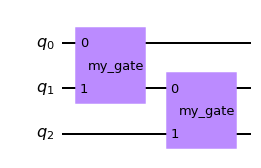

In [ ]:
from qiskit.circuit import Gate

'''
Custom gate
'''
my_gate = Gate(name='my_gate', num_qubits=2, params=[])

qr = QuantumRegister(3, 'q')

circ = QuantumCircuit(qr)
circ.append(my_gate, [qr[0], qr[1]])
circ.append(my_gate, [qr[1], qr[2]])

circ.draw('mpl')

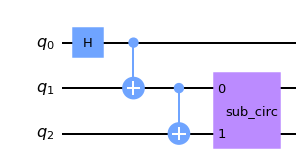

In [ ]:
# Build a sub-circuit
sub_q = QuantumRegister(2)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.h(sub_q[0])
sub_circ.crz(1, sub_q[0], sub_q[1])
sub_circ.id(sub_q[1])
sub_circ.u(1, 2, -2, sub_q[0])

# Convert to a gate and stick it into an arbitrary place in the bigger circuit
sub_inst = sub_circ.to_instruction()

qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.cx(qr[1], qr[2])
circ.append(sub_inst, [qr[1], qr[2]])

circ.draw('mpl')

# QASM

We have used QASM to convert from Qutip gates to Qiskit gates before

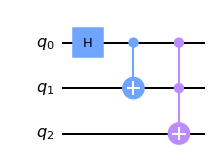

In [ ]:
'''
QUTIP circuit
'''
qc = QubitCircuit(3)
qc.add_gate("SNOT", 0)
qc.add_gate("CNOT", 1, 0)
qc.add_gate("TOFFOLI", targets=2, controls=[0,1])

#Convert to QASM
qasmstr = circuit_to_qasm_str(qc) 

#Draw using Qiskit
qkqc = QuantumCircuit.from_qasm_str(qasmstr)#Import to Qisket
qkqc.draw('mpl')# Draw with QISKET

In [ ]:
print(qasmstr)

// QASM 2.0 file generated by QuTiP

OPENQASM 2.0;
include "qelib1.inc";

qreg q[3];

h q[0];
cx q[0],q[1];
ccx q[0],q[1],q[2];



Now we will define qiskit gates using the QASM string itself.

Note how TRIPLE quotes are used to define a multi-line string

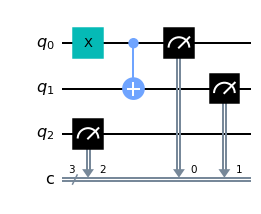

In [ ]:
qasmstr = """
OPENQASM 2.0;
// Define the Pauli X gate.
gate x a
{
U(pi,0,pi) a;
}
qreg q[3];
creg c[3];
x q[0];
CX q[0], q[1];
measure q -> c;
"""

#Import to Qisket
qkqc = QuantumCircuit.from_qasm_str(qasmstr)
qkqc.draw('mpl')

#Quantum Sum

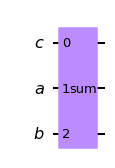

In [ ]:
qasmstr = """
OPENQASM 2.0;
// Include standard gates from IBM Quantum Experience.
include "qelib1.inc";
// Define the quantum sum gate.
gate sum cin, a, b
{
cx a, b;
cx cin, b;
}
// Declare the quantum registers.
qreg c[1];
qreg a[1];
qreg b[1];
// Add the numbers so that |a>|b> becomes |a>|a+b>.
sum c[0], a[0], b[0];
"""

#Import to Qisket
qkqc = QuantumCircuit.from_qasm_str(qasmstr)
qkqc.draw('mpl')

##Decompose circuit into bare CNOT gates then draw

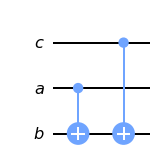

In [ ]:
decomposed_circ = qkqc.decompose()
decomposed_circ.draw('mpl')

#Quantum Sum with Carry

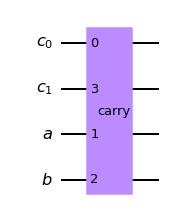

In [ ]:
qasmstr = """
OPENQASM 2.0;
// Include standard gates from IBM Quantum Experience.
include "qelib1.inc";
// Define the quantum carry gate.
gate carry cin, a, b, cout
{
ccx a, b, cout;
cx a, b;
ccx cin, b, cout;
}
// Declare the quantum registers.
qreg c[2];
qreg a[1];
qreg b[1];
// Add the numbers so that |a>|b> becomes |a>|a+b>.
carry c[0], a[0], b[0], c[1];
"""

#Import to Qisket
qkqc = QuantumCircuit.from_qasm_str(qasmstr)
qkqc.draw('mpl')

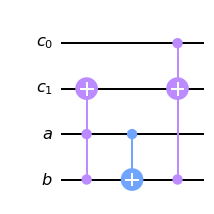

In [ ]:
decomposed_circ = qkqc.decompose()
decomposed_circ.draw('mpl')

# Full Quantum Ripple Adder

Let's add the numbers a = 14 and b = 11


In [ ]:
'''
Remind ourselves of useful python functions for conversion
'''

a = 14
binarystring = format(a,"b")
print(binarystring)
print(int(binarystring,2))

b = 11
binarystring = format(b,"b")
print(binarystring)
print(int(binarystring,2))


1110
14
1011
11


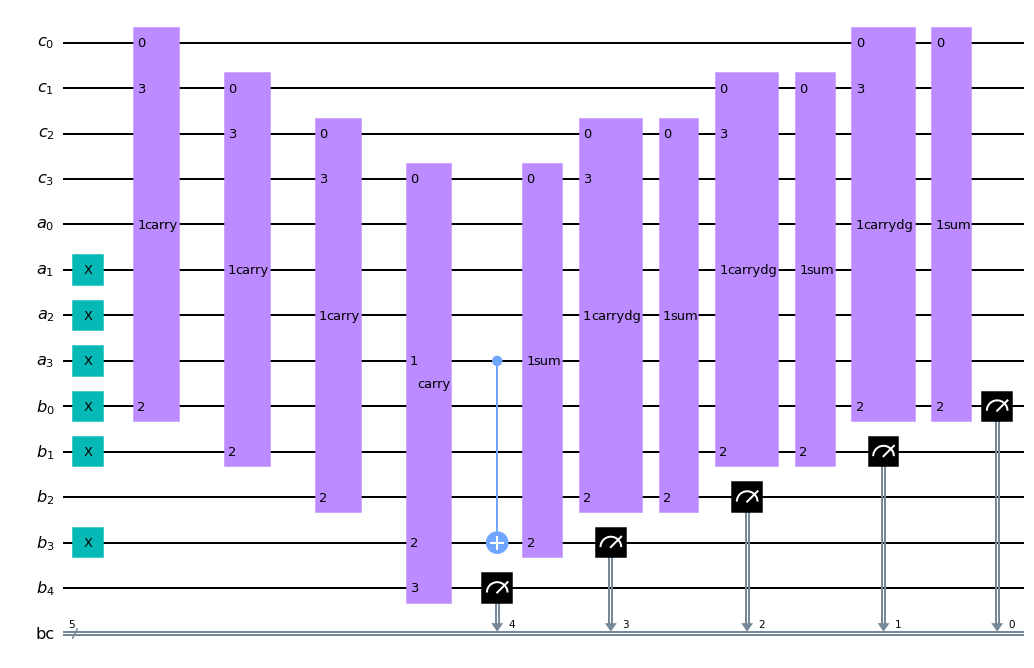

In [ ]:
qasmstr = """
OPENQASM 2.0;
// Include standard gates from IBM Quantum Experience.
include "qelib1.inc";
// Define the quantum sum gate.
gate sum cin, a, b
{
cx a, b;
cx cin, b;
}
// Define the quantum carry gate.
gate carry cin, a, b, cout
{
ccx a, b, cout;
cx a, b;
ccx cin, b, cout;
}
// Define the inverse of the quantum carry gate.
gate carrydg cin, a, b, cout
{
ccx cin, b, cout;
cx a, b;
ccx a, b, cout;
}
// Declare the quantum registers.
qreg c[4];
qreg a[4];
qreg b[5];
// Declare the classical registers.
creg bc[5];
//
// Set the input states by applying X gates.
//
x a[1];
x a[2];
x a[3]; 
// a = 1110
x b[0];
x b[1];
x b[3]; 
// b = 1011
// Add the numbers so that |a>|b> becomes |a>|a+b>.
carry c[0], a[0], b[0], c[1];
carry c[1], a[1], b[1], c[2];
carry c[2], a[2], b[2], c[3];
carry c[3], a[3], b[3], b[4];
cx a[3], b[3];
sum c[3], a[3], b[3];
carrydg c[2], a[2], b[2], c[3];
sum c[2], a[2], b[2];
carrydg c[1], a[1], b[1], c[2];
sum c[1], a[1], b[1];
carrydg c[0], a[0], b[0], c[1];
sum c[0], a[0], b[0];
// Measure the sum and put it in the classical register.
measure b -> bc;
"""

#Import to Qisket
qkqc = QuantumCircuit.from_qasm_str(qasmstr)
qkqc.draw('mpl')


Decompose the circuit one layer into the Toffoli (Control-Control-Not gates) and the CNOT gates.


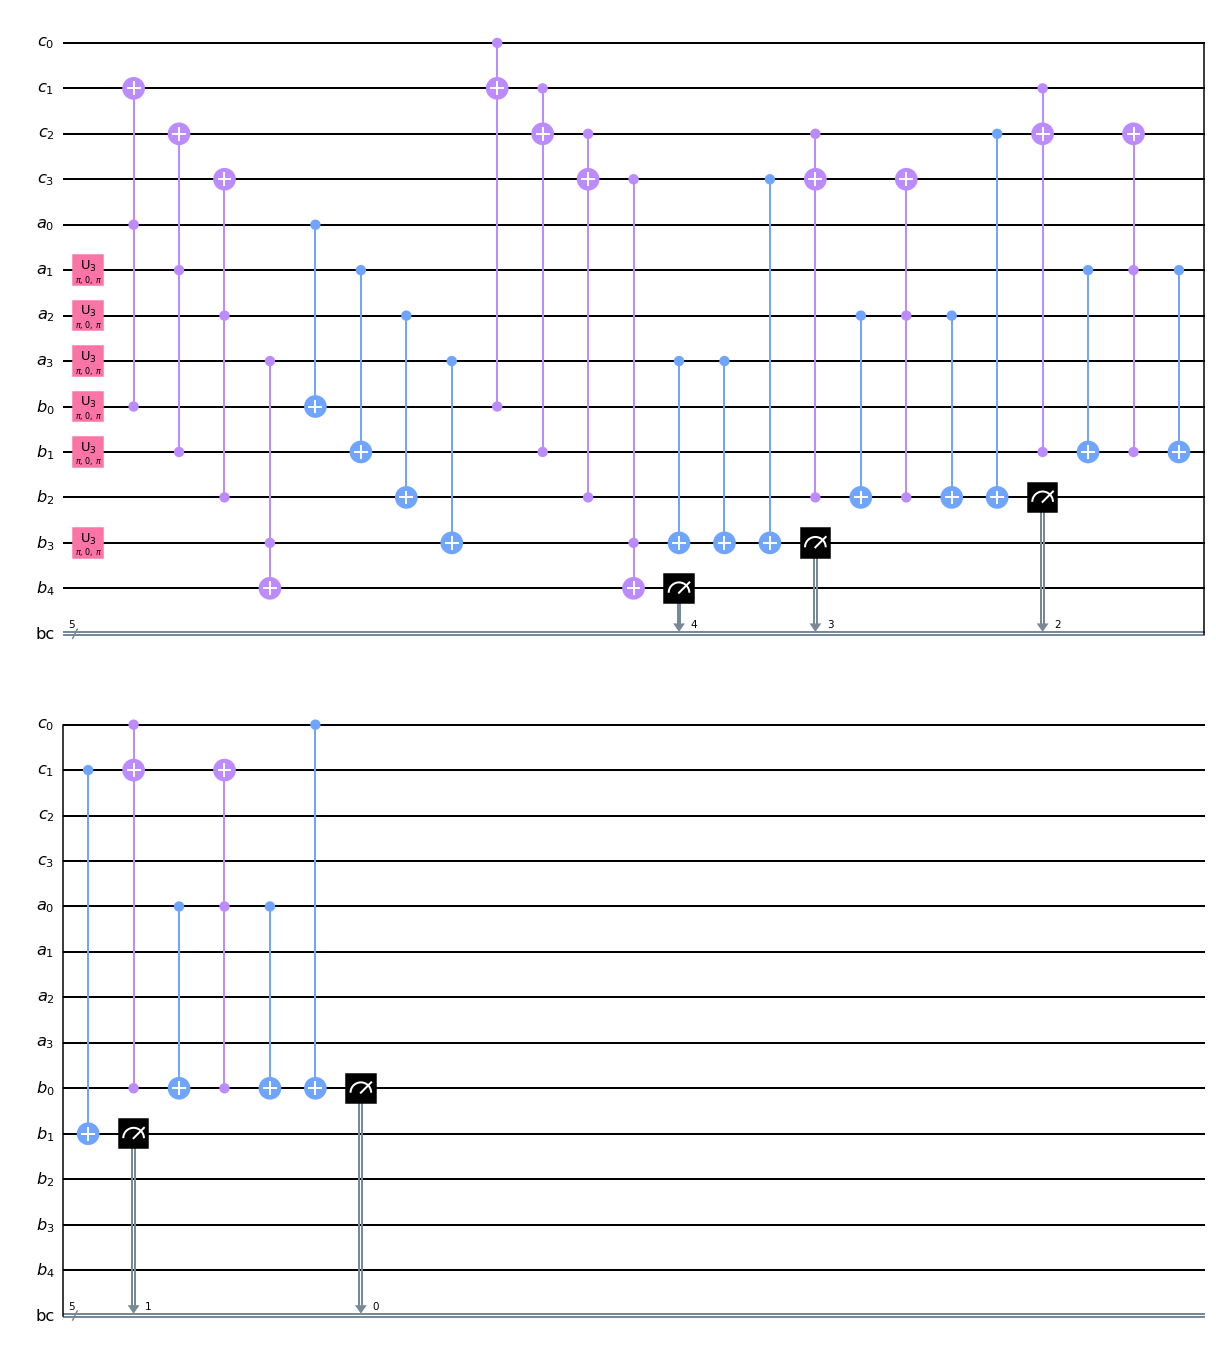

In [ ]:
decomposed_circ = qkqc.decompose() # Does not modify original circuit
decomposed_circ.draw('mpl')

Decompose another layer, breaking the Toffoli gates into CNOT gates for running on a superconducting system.

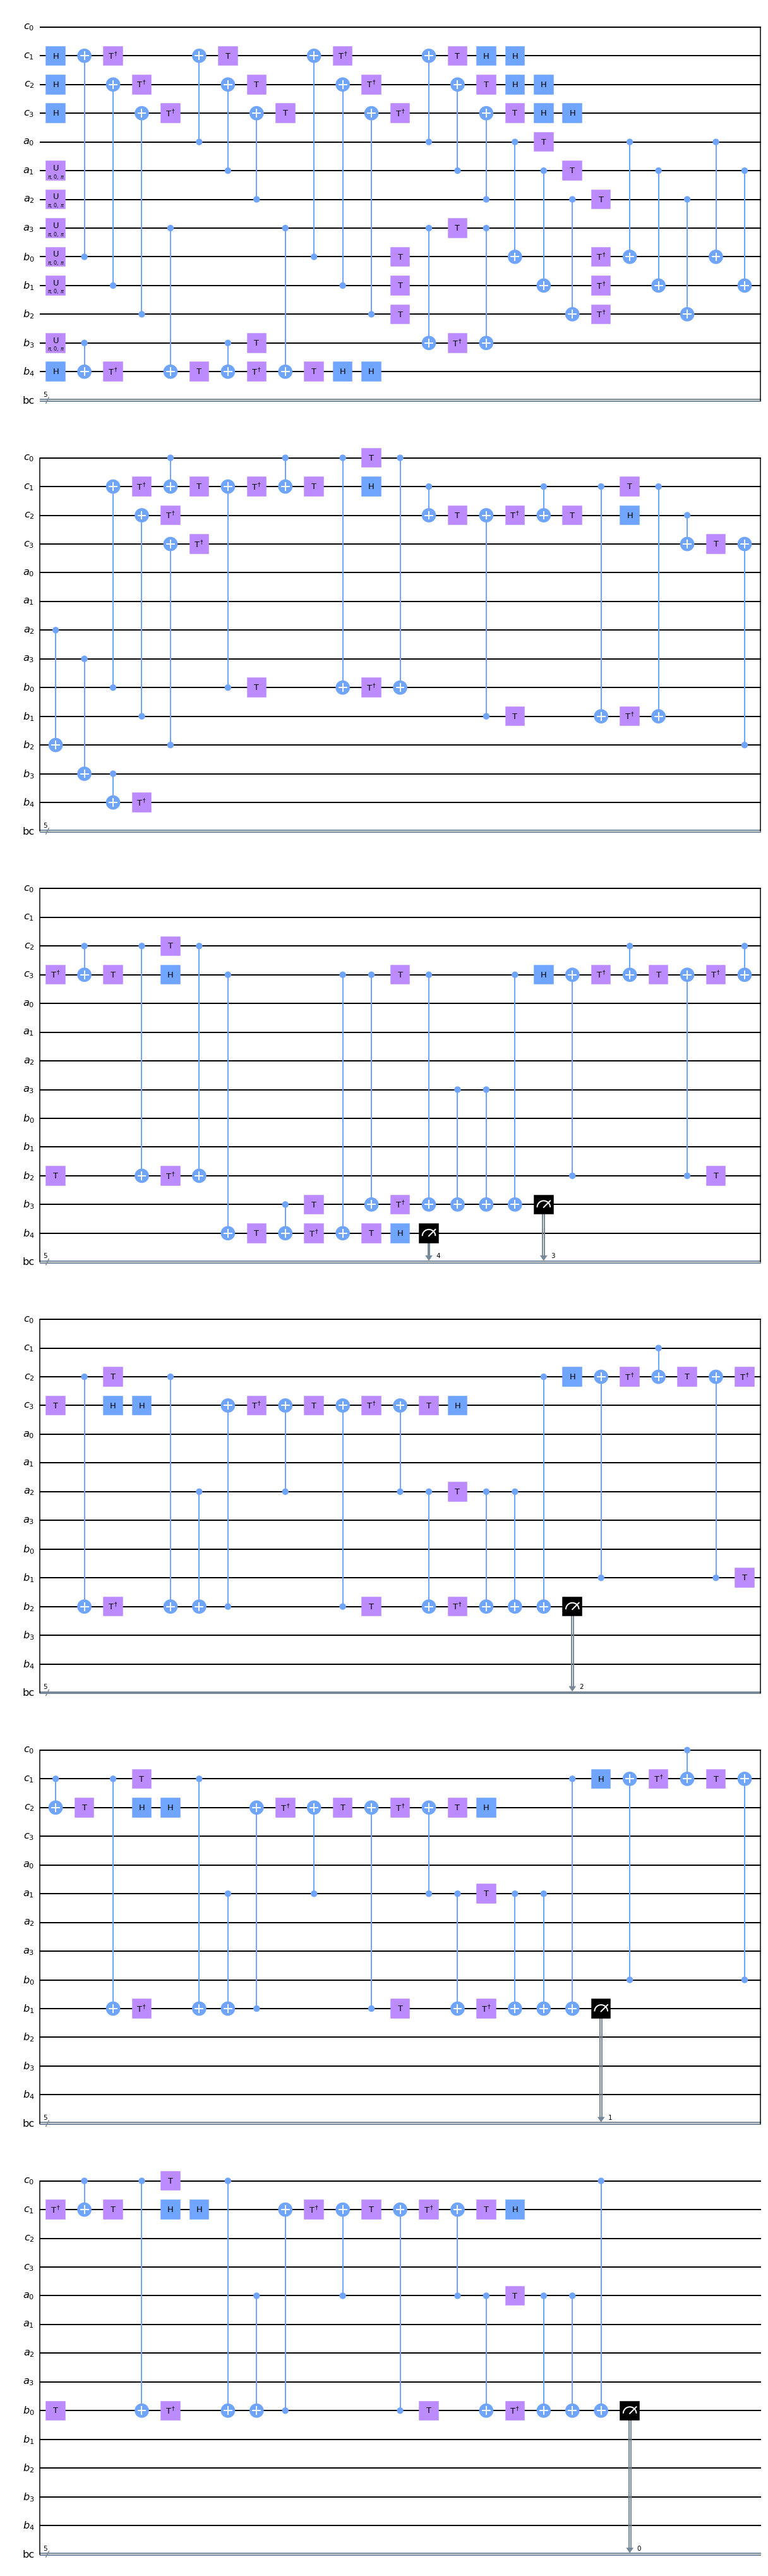

In [ ]:
decomposed_circ_full = decomposed_circ.decompose()
decomposed_circ_full.draw('mpl')

In [ ]:
'''
Calculate the depth of the quantum circuit
'''
decomposed_circ_full.depth()

119

## Over 100 gates just to add two 5 bit numbers!


In [ ]:

'''
Simulate the circuit
'''
backend = BasicAer.get_backend('qasm_simulator')

job = backend.run(transpile(qkqc, backend))
counts = job.result().get_counts()

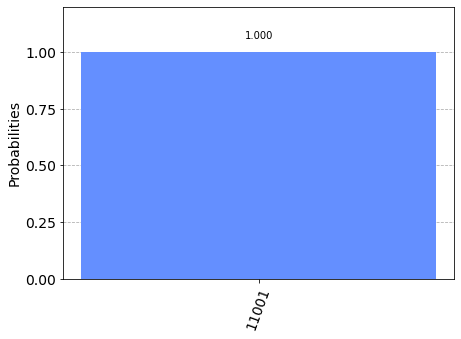

In [ ]:
# Import visualizations from Qiskit.
from qiskit.visualization import *
# Plot the count as a histogram.
plot_histogram(counts)

In [ ]:
binarystring = format(25,"b")
print(binarystring)
print(int(binarystring,2))

11001
25


###Quantum computing success!

14 + 11 = 25 



# Running on real hardware

Next we will sign up to access IBM's quantum computers on the cloud.

It is free to register and doesn't take too long.

https://quantum-computing.ibm.com/login


Once you've registered you can use your unique API token to access their hardware and simulators via the cloud.


In [ ]:
from qiskit import IBMQ

IBMQ.save_account('5a10d5ee58627190cb4edb6096e948bd7011fb62517bce46e1e13f63f33901dae7091e8ab344d243b89a3b0f4b86b217ebfce59b0f5b9185edcbc58c356789ac', overwrite=True)

In [ ]:
# Import the Qiskit IBMQ library.
from qiskit import IBMQ
# Load our IBMQ account.
provider = IBMQ.load_account()

In [ ]:
# List IBM backends available
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [ ]:
from qiskit import execute
# Choose a quantum processor as the backend.
backend = provider.get_backend('ibmq_quito')
# Execute the job.
#job = execute(qkqc, backend)

#Note enough qubits?

Bummer. It seems like none of the backends that are freely available can run our 15 qubit circuit!

Below are some useful snippets regardless.


In [ ]:
'''
To cancel a job
'''
#job.cancel()

'\nTo cancel a job\n'

In [ ]:
# Check the status of the job.
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


{'11001': 1024}


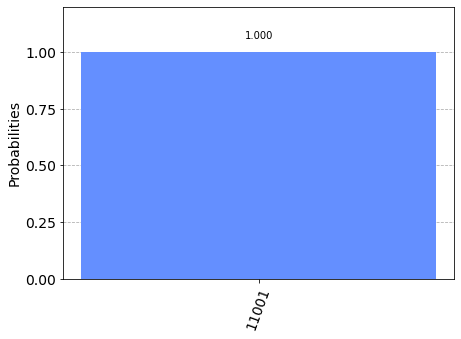

In [ ]:
'''
Plot results
'''
count = job.result().get_counts()
print(count)
plot_histogram(counts)

#Fake qubits

Luckily we can just load a fake version of a quantum computer into the simulator and use its noise characteristics to simulate the circuit.

In [ ]:
from qiskit.test.mock import FakeGuadalupe
device_backend = FakeGuadalupe()

Guadalupe has 16 qubits

https://quantum-computing.ibm.com/services?services=systems&system=ibmq_guadalupe



In [ ]:
from qiskit.providers.aer.noise import *
'''
Load the noise model
'''
backend = Aer.get_backend('aer_simulator')
counts1 = []
values1 = []
noise_model = None
device = QasmSimulator.from_backend(device_backend)
coupling_map = device.configuration().coupling_map
noise_model = NoiseModel.from_backend(device)
basis_gates = noise_model.basis_gates

print(noise_model)
print()

NoiseModel:
  Basis gates: ['cx', 'id', 'kraus', 'qerror_loc', 'quantum_channel', 'roerror', 'rz', 'save_amplitudes', 'save_amplitudes_sq', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_probabilities', 'save_probabilities_dict', 'save_stabilizer', 'save_state', 'save_statevector', 'save_statevector_dict', 'set_density_matrix', 'set_stabilizer', 'set_statevector', 'snapshot', 'sx', 'x']
  Instructions with noise: ['measure', 'sx', 'x', 'cx', 'reset', 'id']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('id', (5,)), ('id', (6,)), ('id', (7,)), ('id', (8,)), ('id', (9,)), ('id', (10,)), ('id', (11,)), ('id', (12,)), ('id', (13,)), ('id', (14,)), ('id', (15,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('sx', (5,)), ('sx', (6,)), ('sx', (7,)), ('sx', (8,)), ('sx', (9,)), ('sx', (10,)), ('sx', (11,)), ('sx', (12,)), ('sx',

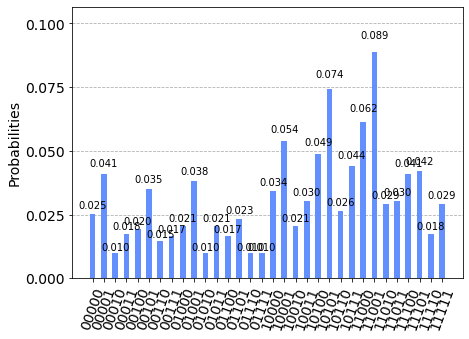

In [ ]:
result = execute(qkqc, backend,
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)

# Success!

The simulator just barely got it right!

In [ ]:
binarystring = format(25,"b")
print(binarystring)
print(int(binarystring,2))

11001
25


# Exercises

  1. Show that the quantum sum and carry circuit works by inputing a=1, b=1, cin=1 and showing the output. 

  1. Use the qiskit method '.decompose()', to decompose a single Toffoli gate into it's bare CNOT gates and single qubit gates. How many CNOT gates are required? How many single qubit gates are required? 

  1. How much error does a single Toffoli gate accumulate if it is run with CNOT gates with 1% error each and single qubit gates with 0.1% error each?

  1. How does this expand if qubits are distant on the coupling map of the quantum processor? That is, how many more CNOT gates are needed for qubits that are connected via two additional intermediate qubits? (Like qubit 1 and qubit 10 on the ibmq_guadalupe processor)?

  1. Are any entangled states created during the quantum adder circuit? Why or why not?

  1. Change the inputs a and b to larger numbers that require an extra bit so that the input register of the quantum adder expands from 4 qubits each to 5 qubits each. 

  1. Run the 5 bit quantum adder using a unitary simulator ( no noise ). 

  1. Run the 5 bit quantum adder using noise from a 27 qubit system from IBM by importing its noise data. Do you get the correct answer?


### Exercise 1

Show that the quantum sum and carry circuit works by inputing a=1, b=1, cin=1 and showing the output.

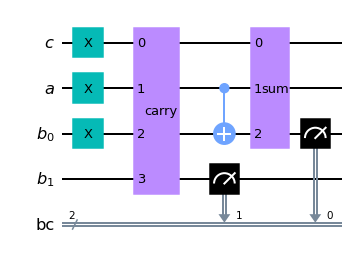

In [ ]:
'''
Exercise 1
'''
qasmstr = """
OPENQASM 2.0;
// Include standard gates from IBM Quantum Experience.
include "qelib1.inc";
// Define the quantum sum gate.
gate sum cin, a, b
{
cx a, b;
cx cin, b;
}
// Define the quantum carry gate.
gate carry cin, a, b, cout
{
ccx a, b, cout;
cx a, b;
ccx cin, b, cout;
}
// Declare the quantum registers.
qreg c[1];
qreg a[1];
qreg b[2];
// Declare the classical registers.
creg bc[2];
// Set the input states by applying X gates.
//
x a[0];
// a = 1
x b[0];
// b = 1
x c[0];
// cin = 1
// Add the numbers so that |a>|b> becomes |a>|a+b>.
carry c[0], a[0], b[0], b[1];
cx a[0], b[0];
sum c[0], a[0], b[0];
// Measure the sum and put it in the classical register.
measure b -> bc;
"""

#Import to Qisket
qkqc = QuantumCircuit.from_qasm_str(qasmstr)
qkqc.draw('mpl')

In [ ]:
'''
Simulate the circuit
'''
backend = BasicAer.get_backend('qasm_simulator')

job = backend.run(transpile(qkqc, backend))
counts = job.result().get_counts()

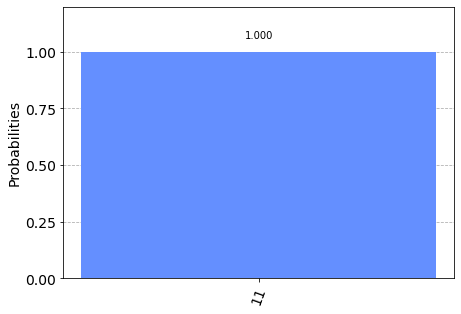

In [ ]:
# Import visualizations from Qiskit.
from qiskit.visualization import *
# Plot the count as a histogram.
plot_histogram(counts)

In [ ]:
binarystring = format(3,"b")
print(binarystring)
print(int(binarystring,2))

11
3


### Exercise 2

Use the qiskit method '.decompose()', to decompose a single Toffoli gate into it's bare CNOT gates and single qubit gates. How many CNOT gates are required? How many single qubit gates are required?

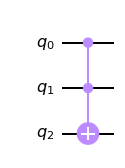

In [ ]:
'''
Exercise 2
'''

qc = QubitCircuit(3)
qc.add_gate("TOFFOLI", targets=2, controls=[0,1])

#Convert to QASM
qasmstr = circuit_to_qasm_str(qc) 

#Draw using Qiskit
qkqc = QuantumCircuit.from_qasm_str(qasmstr)#Import to Qisket
qkqc.draw('mpl')# Draw with QISKET

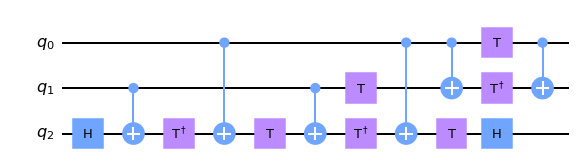

In [ ]:
decomposed_circ = qkqc.decompose()
decomposed_circ.draw('mpl')

##### EXERCISE 2 ANSWER:

A minimum of 6 CNOT Gates, and 9 single qubit gates (2 Hadamard Gates and 6 $ \pi $/8 Gates)

### Exercise 3

How much error does a single Toffoli gate accumulate if it is run with CNOT gates with 1% error each and single qubit gates with 0.1% error each?

In [ ]:
'''
Exercise 3
'''
import math
print('Error is:', 6*1+9*.1,'%')

Error is: 6.9 %


### Exercise 4

How does this expand if qubits are distant on the coupling map of the quantum processor? That is, how many more CNOT gates are needed for qubits that are connected via two additional intermediate qubits? (Like qubit 1 and qubit 10 on the ibmq_guadalupe processor)?

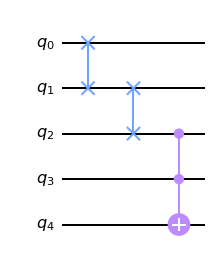

In [ ]:
'''
Exercise 4
'''
qc = QuantumCircuit(5)
# swaps states of qubits a and b
qc.swap(1,0)
qc.swap(1,2)
qc.toffoli(2,3,4)

qc.draw('mpl')

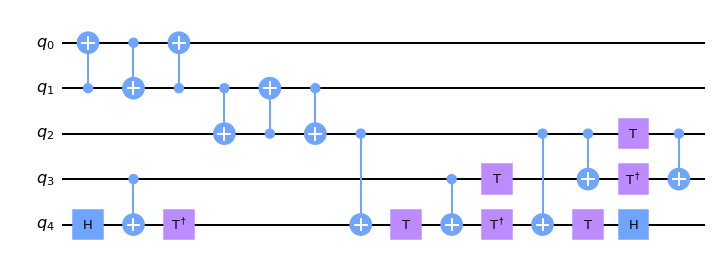

In [ ]:
decomposed_circ = qc.decompose()
decomposed_circ.draw('mpl')

#### EXERCISE 4 ANSWER:

Since, we want to let qubit-1 talk with qubit-10 in guadalupe, based on the mapping, it's connect in such way:

1---4---7---10

So we need to let the info in qubit-1 to get to qubit-7 so that it can talk with qubit-10. We can use swap to swap the quantum info here. 

That's six more CNOT gate. 

In [ ]:
print('Error now is:', 12*1+9*.1,'%')

Error now is: 12.9 %


OR...... CONSIDER THIS, 

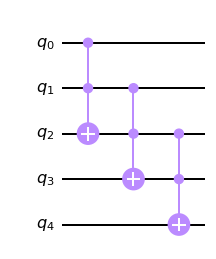

In [ ]:
'''
Exercise 4
'''
qc = QuantumCircuit(5)
# swaps states of qubits a and b
qc.toffoli(0,1,2)
qc.toffoli(1,2,3)
qc.toffoli(2,3,4)

qc.draw('mpl')

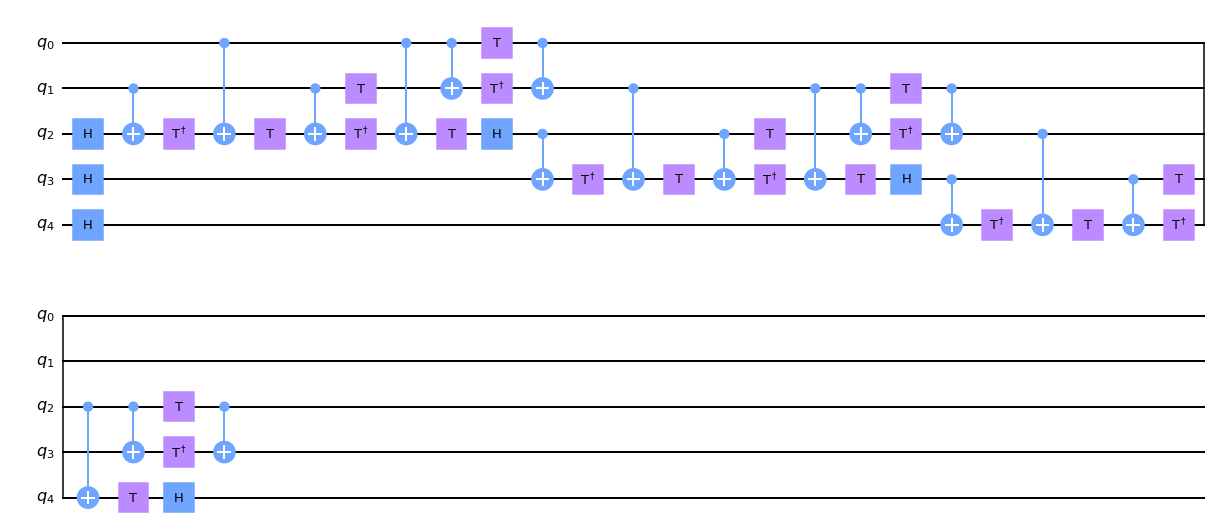

In [ ]:
decomposed_circ = qc.decompose()
decomposed_circ.draw('mpl')

### Exercise 5

Are any entangled states created during the quantum adder circuit? Why or why not?

In [ ]:
'''
Exercise 5
'''

'\nExercise 5\n'

#### EXERCISE 5 ANSWER:

A entangled state of qubits can be made from Hadamard gate followed by a CNOT/CX gate in control qubit. So yes, referring back to the Quantum Ripple Adder in the Lab section, there are CNOT's control from Hadamard.So there are entangled states. 



### Exercise 6

Change the inputs a and b to larger numbers that require an extra bit so that the input register of the quantum adder expands from 4 qubits each to 5 qubits each.

In [ ]:
'''
Exercise 6
'''
a = 17
binarystring = format(a,"b")
print(binarystring)
print(int(binarystring,2))

b = 21
binarystring = format(b,"b")
print(binarystring)
print(int(binarystring,2))

print('sum is:', a+b)
print('sum in binary:', format(a+b,"b"))

10001
17
10101
21
sum is: 38
sum in binary: 100110


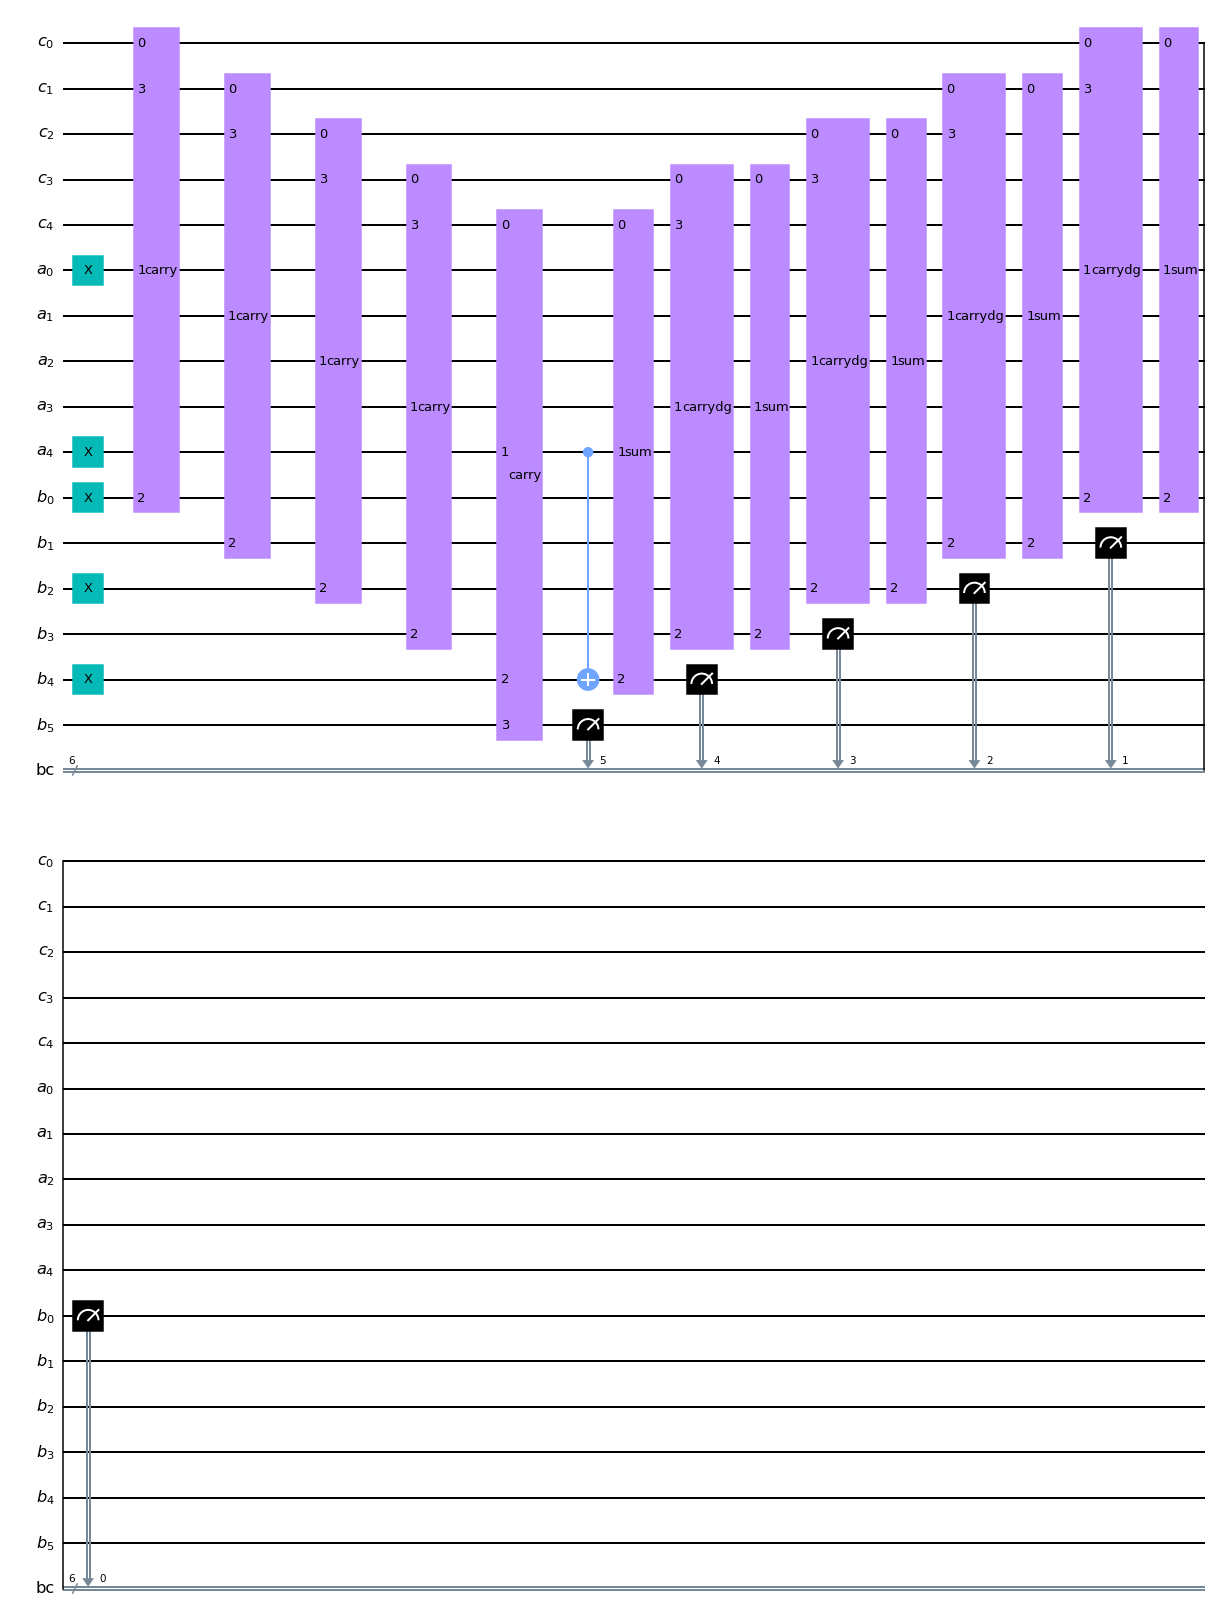

In [ ]:
qasmstr = """
OPENQASM 2.0;
// Include standard gates from IBM Quantum Experience.
include "qelib1.inc";
// Define the quantum sum gate.
gate sum cin, a, b
{
cx a, b;
cx cin, b;
}
// Define the quantum carry gate.
gate carry cin, a, b, cout
{
ccx a, b, cout;
cx a, b;
ccx cin, b, cout;
}
// Define the inverse of the quantum carry gate.
gate carrydg cin, a, b, cout
{
ccx cin, b, cout;
cx a, b;
ccx a, b, cout;
}
// Declare the quantum registers.
qreg c[5];
qreg a[5];
qreg b[6];
// Declare the classical registers.
creg bc[6];
//
// Set the input states by applying X gates.
//
x a[0];
x a[4]; 
// a = 1110 a = 10001
x b[0];
x b[2];
x b[4]; 
// b = 10101
// Add the numbers so that |a>|b> becomes |a>|a+b>.
carry c[0], a[0], b[0], c[1];
carry c[1], a[1], b[1], c[2];
carry c[2], a[2], b[2], c[3];
carry c[3], a[3], b[3], c[4];
carry c[4], a[4], b[4], b[5];
cx a[4], b[4];
sum c[4], a[4], b[4];
carrydg c[3], a[3], b[3], c[4];
sum c[3], a[3], b[3];
carrydg c[2], a[2], b[2], c[3];
sum c[2], a[2], b[2];
carrydg c[1], a[1], b[1], c[2];
sum c[1], a[1], b[1];
carrydg c[0], a[0], b[0], c[1];
sum c[0], a[0], b[0];
// Measure the sum and put it in the classical register.
measure b -> bc;
"""

#Import to Qisket
qkqc = QuantumCircuit.from_qasm_str(qasmstr)
qkqc.draw('mpl')


### Exercise 7

Run the 5 bit quantum adder using a unitary simulator ( no noise ).

In [ ]:
'''
Exercise 7
'''
# Simulate the circuit
backend = BasicAer.get_backend('qasm_simulator')

job = backend.run(transpile(qkqc, backend))
counts = job.result().get_counts()

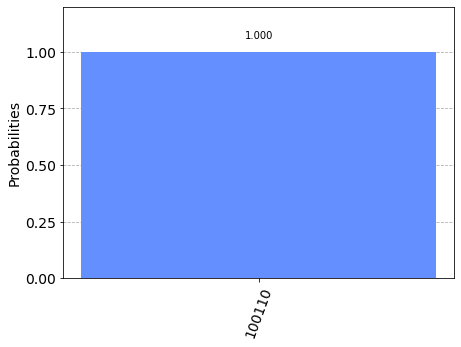

In [ ]:
# Import visualizations from Qiskit.
from qiskit.visualization import *
# Plot the count as a histogram.
plot_histogram(counts)

In [ ]:
binarystring = format(38,"b")
print(binarystring)
print(int(binarystring,2))

100110
38


### Exercise 8

Run the 5 bit quantum adder using noise from a 27 qubit system from IBM by importing its noise data. Do you get the correct answer?

In [ ]:
'''
Exercise 8
'''
from qiskit.test.mock import FakeHanoi

device_backend = FakeHanoi()
backend = Aer.get_backend('aer_simulator')
counts1 = []
values1 = []
noise_model = None
device = QasmSimulator.from_backend(device_backend)
coupling_map = device.configuration().coupling_map
noise_model = NoiseModel.from_backend(device)
basis_gates = noise_model.basis_gates

print(noise_model)
print()

NoiseModel:
  Basis gates: ['cx', 'id', 'kraus', 'qerror_loc', 'quantum_channel', 'roerror', 'rz', 'save_amplitudes', 'save_amplitudes_sq', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_probabilities', 'save_probabilities_dict', 'save_stabilizer', 'save_state', 'save_statevector', 'save_statevector_dict', 'set_density_matrix', 'set_stabilizer', 'set_statevector', 'snapshot', 'sx', 'x']
  Instructions with noise: ['measure', 'sx', 'x', 'cx', 'reset', 'id']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('id', (5,)), ('id', (6,)), ('id', (7,)), ('id', (8,)), ('id', (9,)), ('id', (10,)), ('id', (11,)), ('id', (12,)), ('id', (13,)), ('id', (14,)), ('id', (15,)), ('id', (16,)), ('id', (17,)), ('id', (18,)), ('id', (19,)), ('id', (20,)), ('id', (21,)), ('id', (22,)), ('id', (23,)), ('id', (24,)), ('id', (25,)

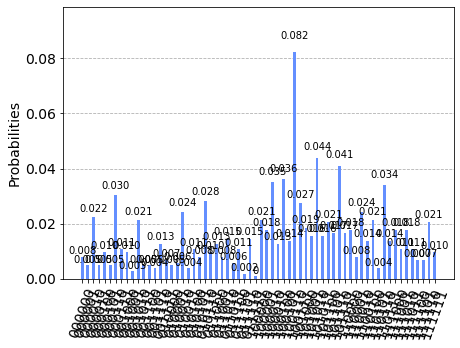

In [ ]:
result = execute(qkqc, backend,
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)

In [ ]:
import operator
max(counts.items(), key=operator.itemgetter(1))[0]

'100110'

In [ ]:
binarystring = format(38,"b")
print(binarystring)
print(int(binarystring,2))

100110
38


YES, CORRECT ANSWER!